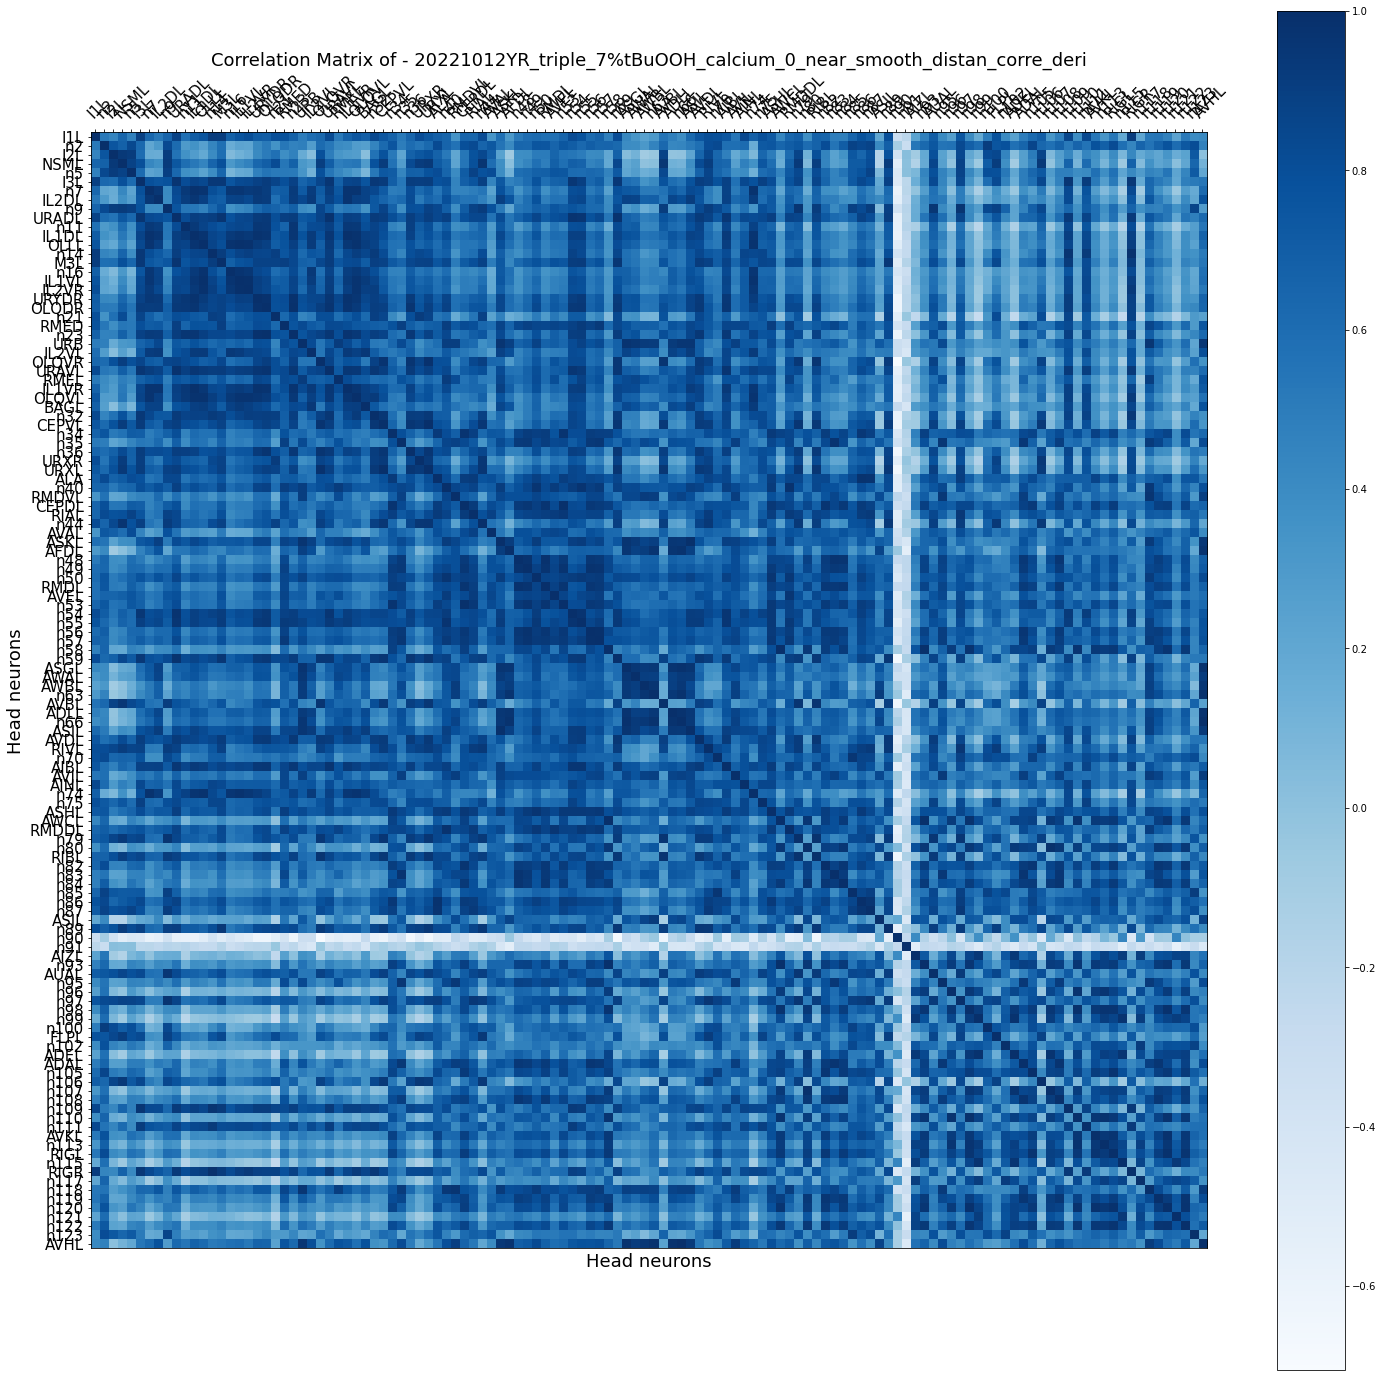

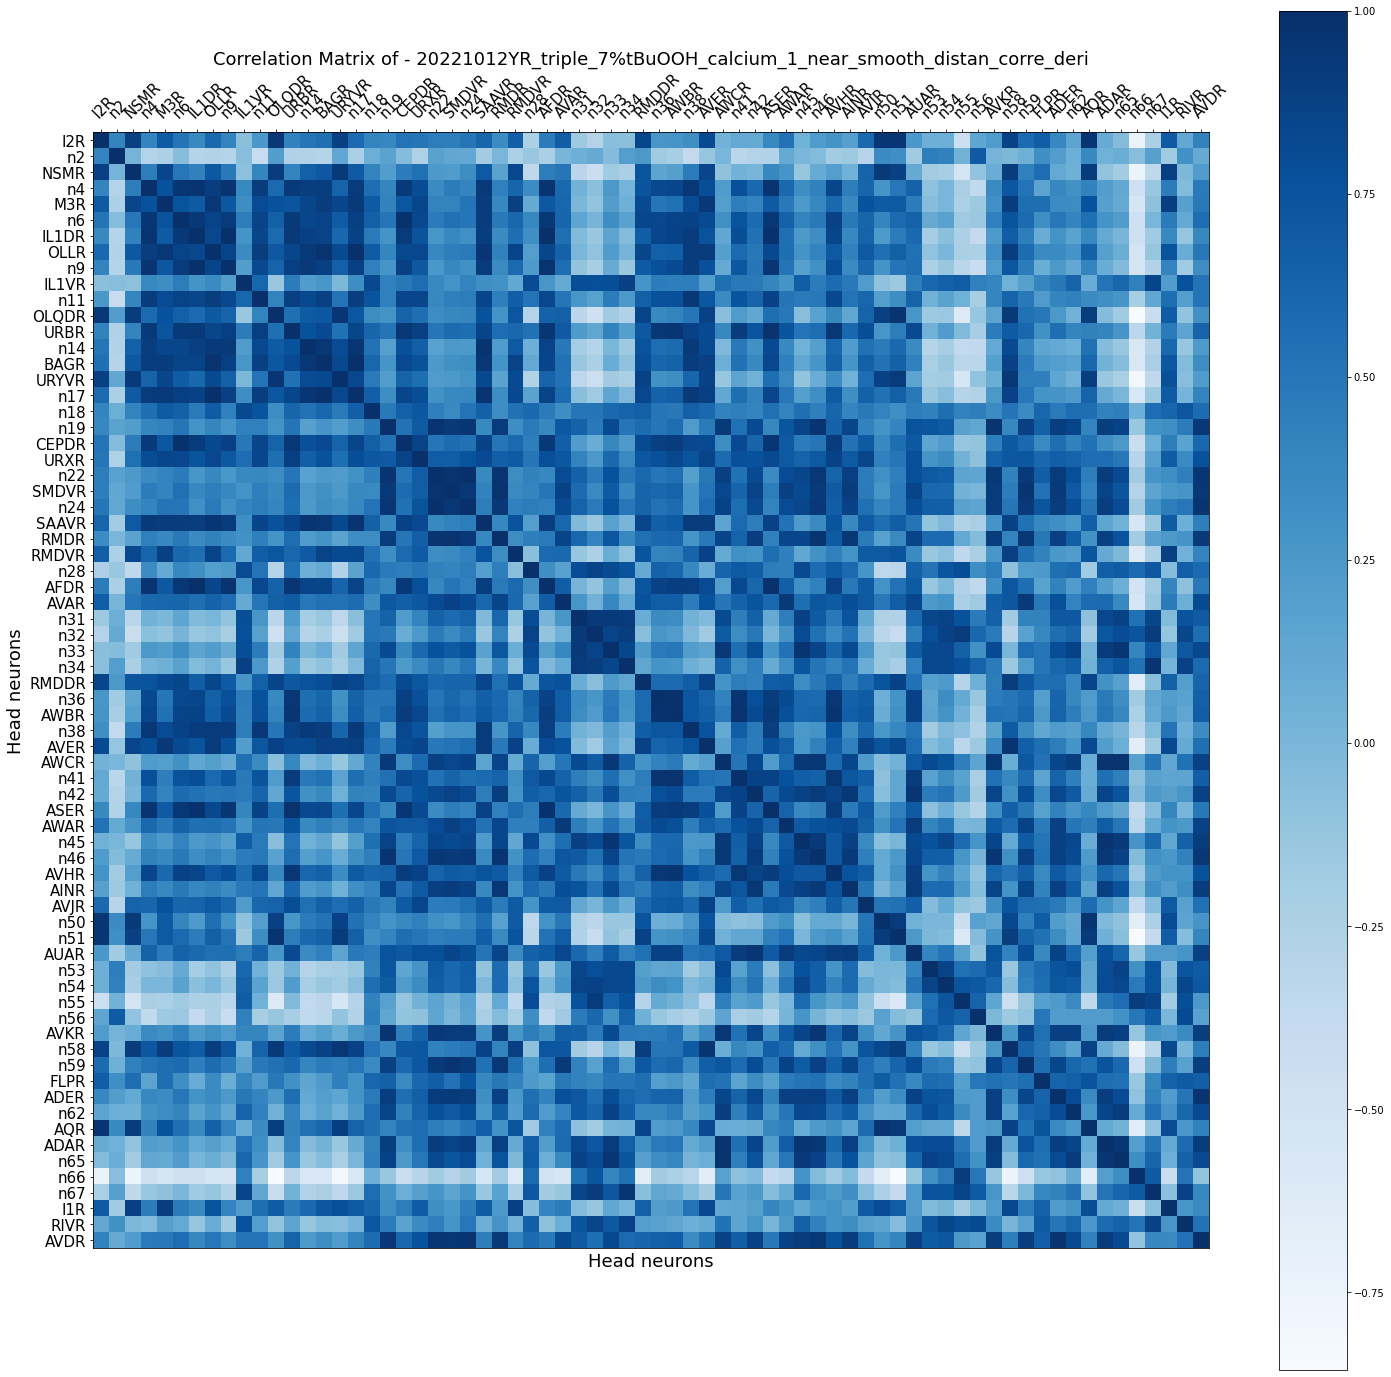

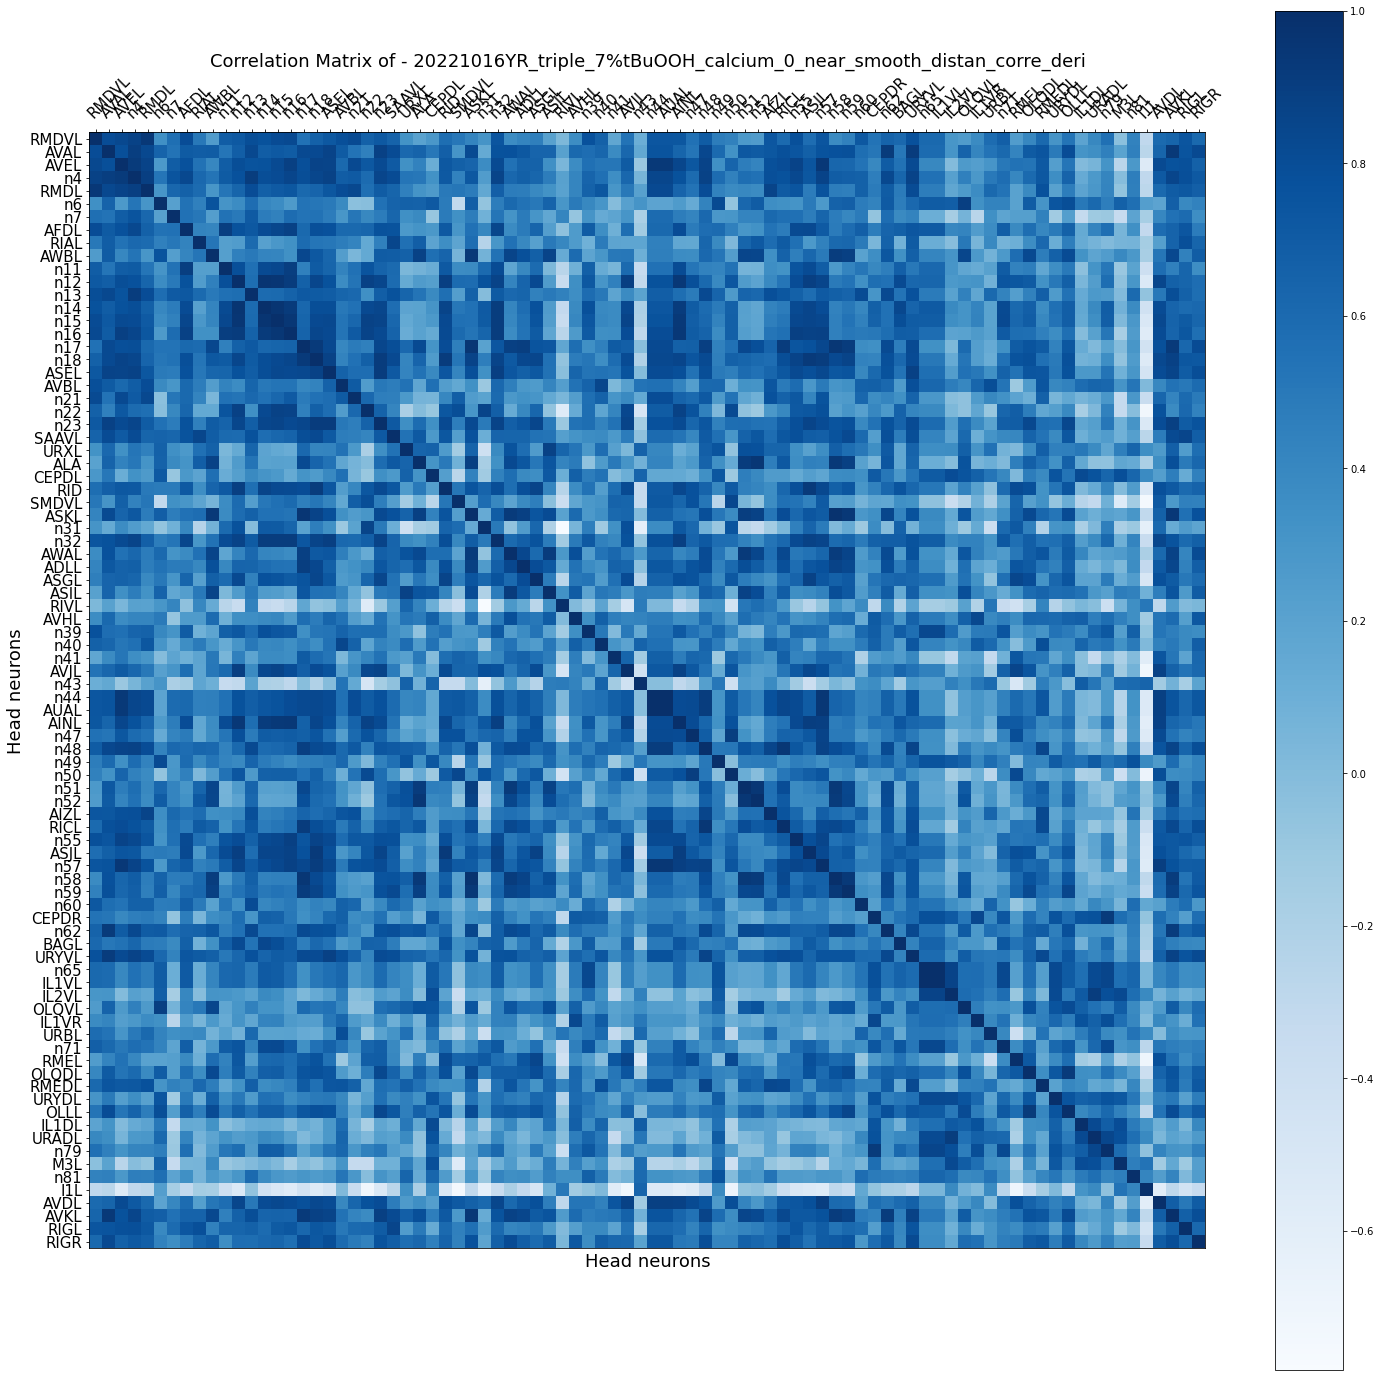

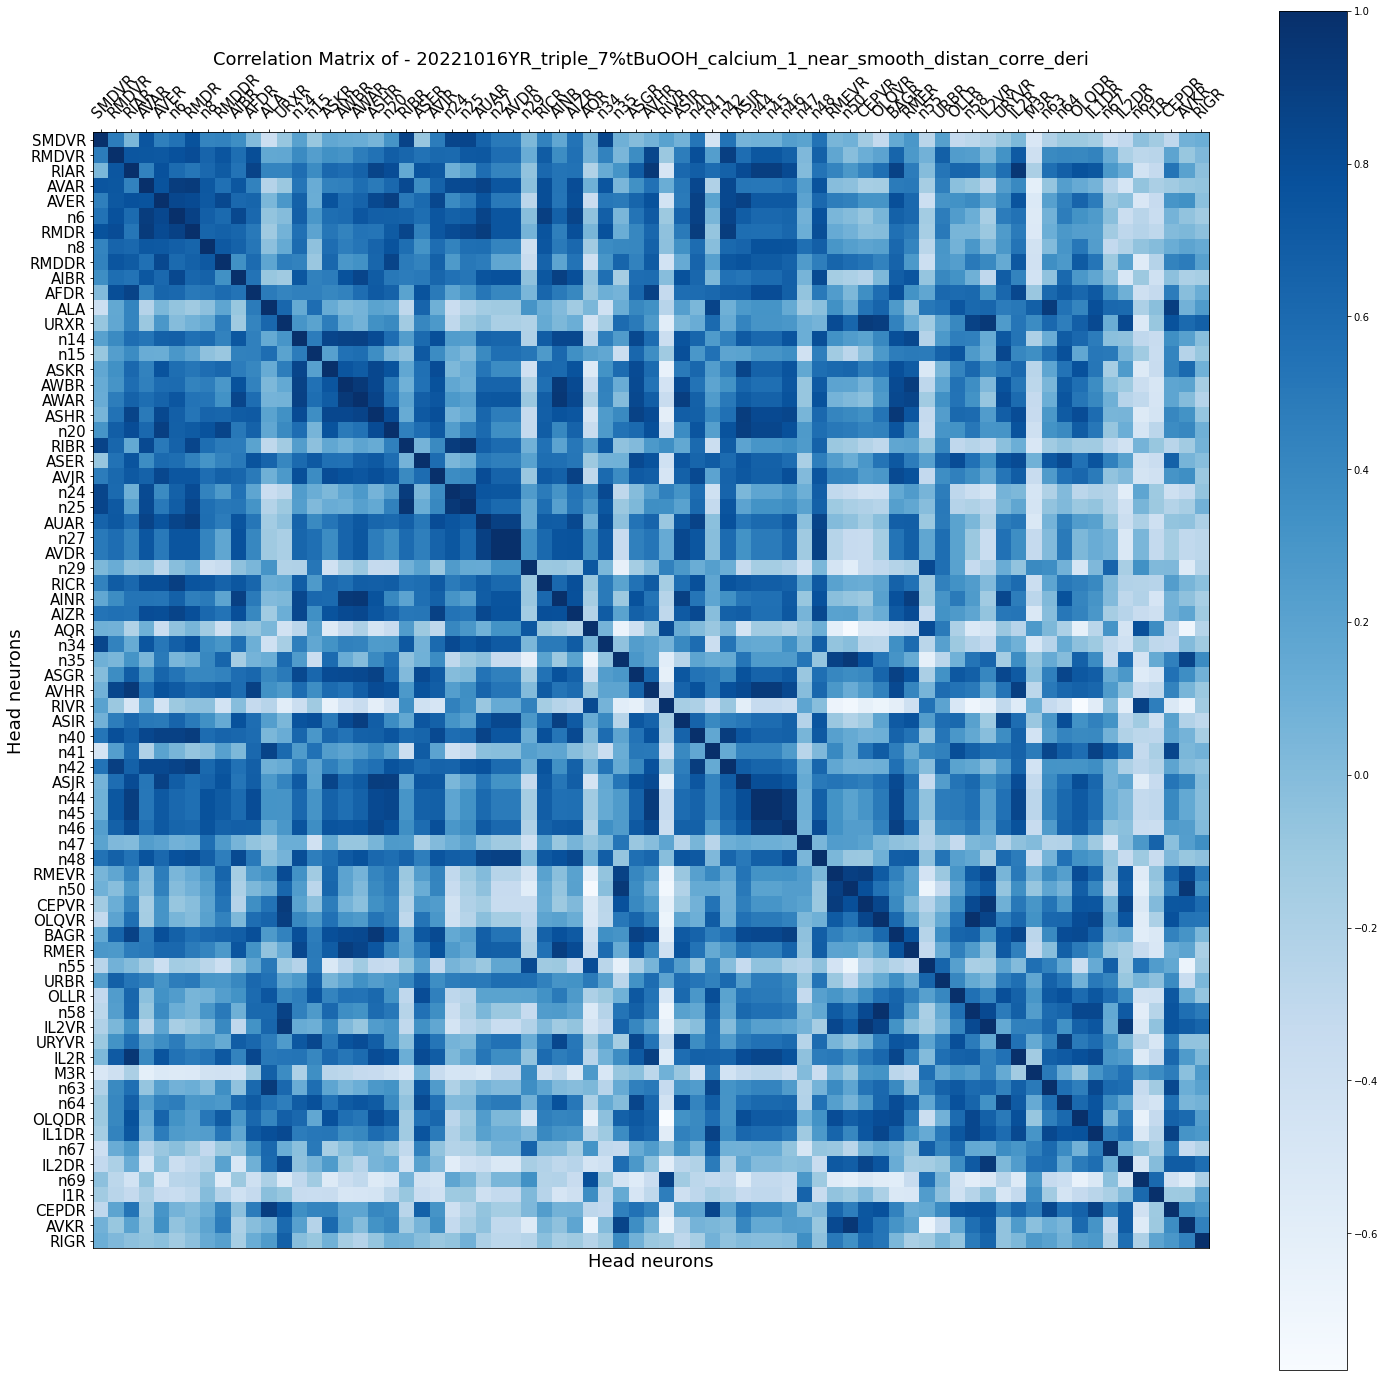

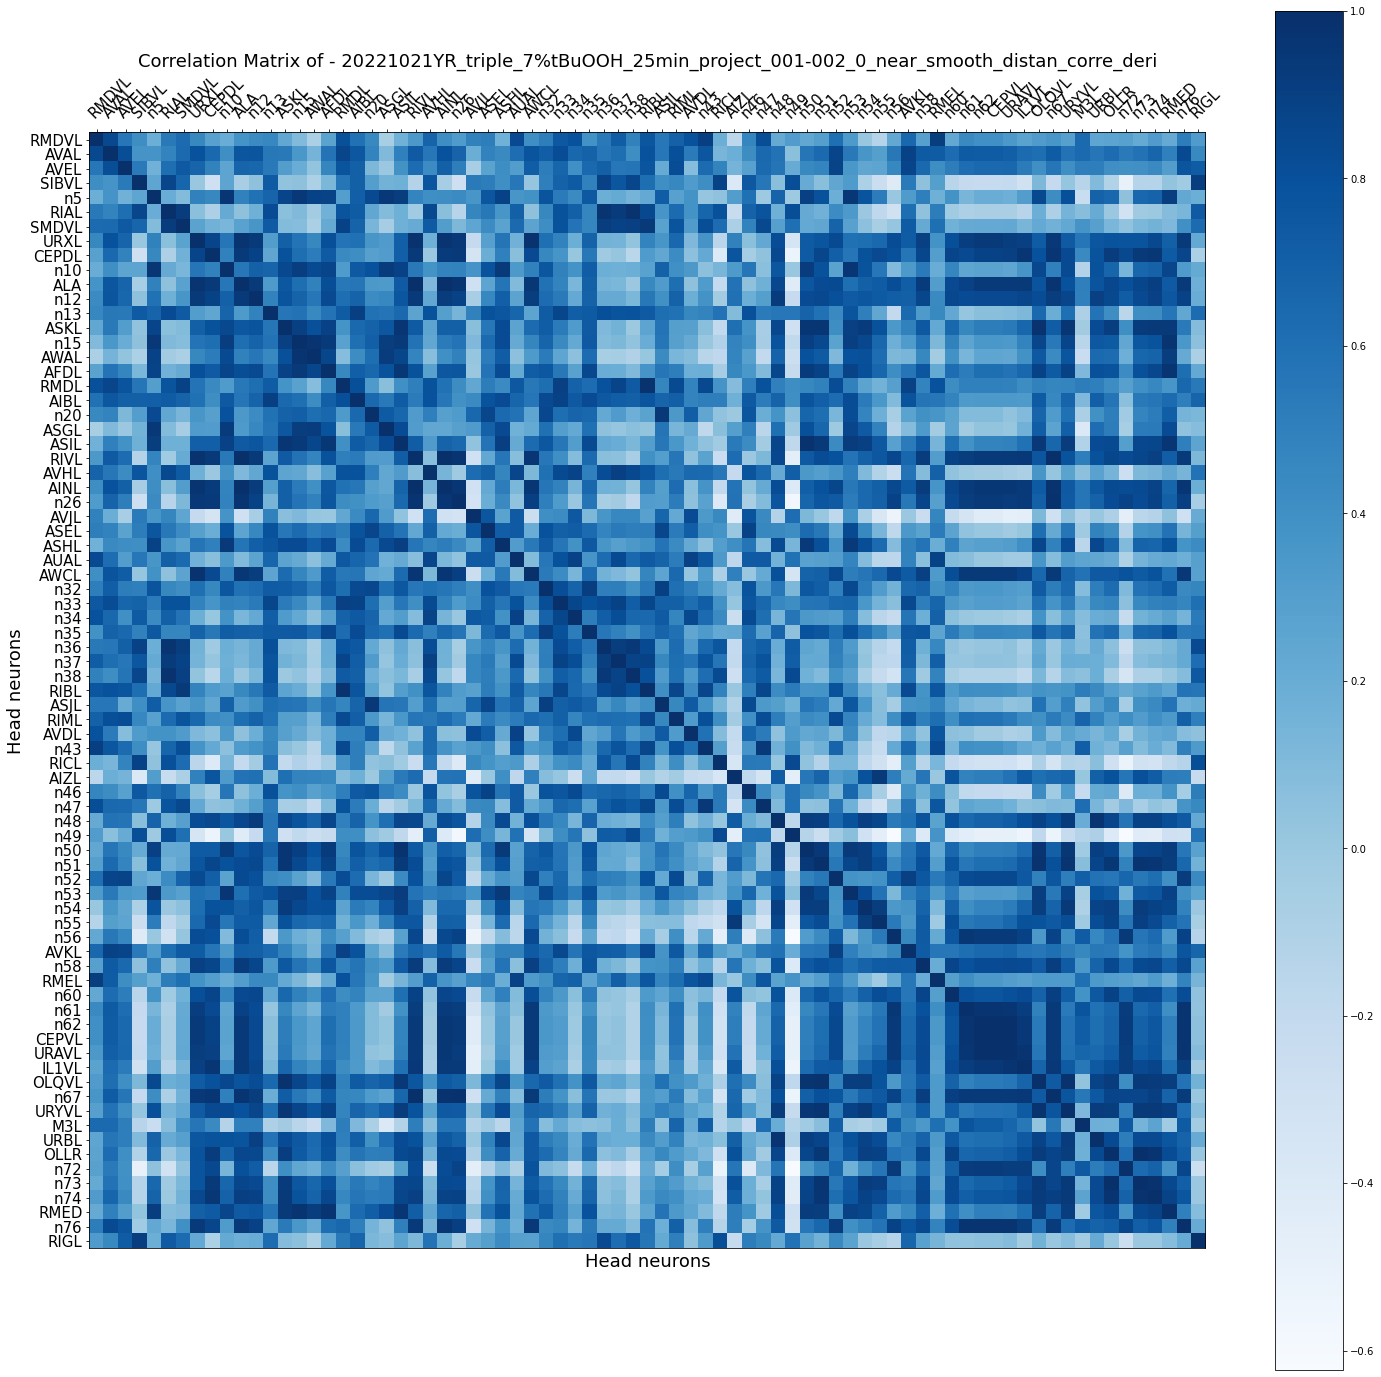

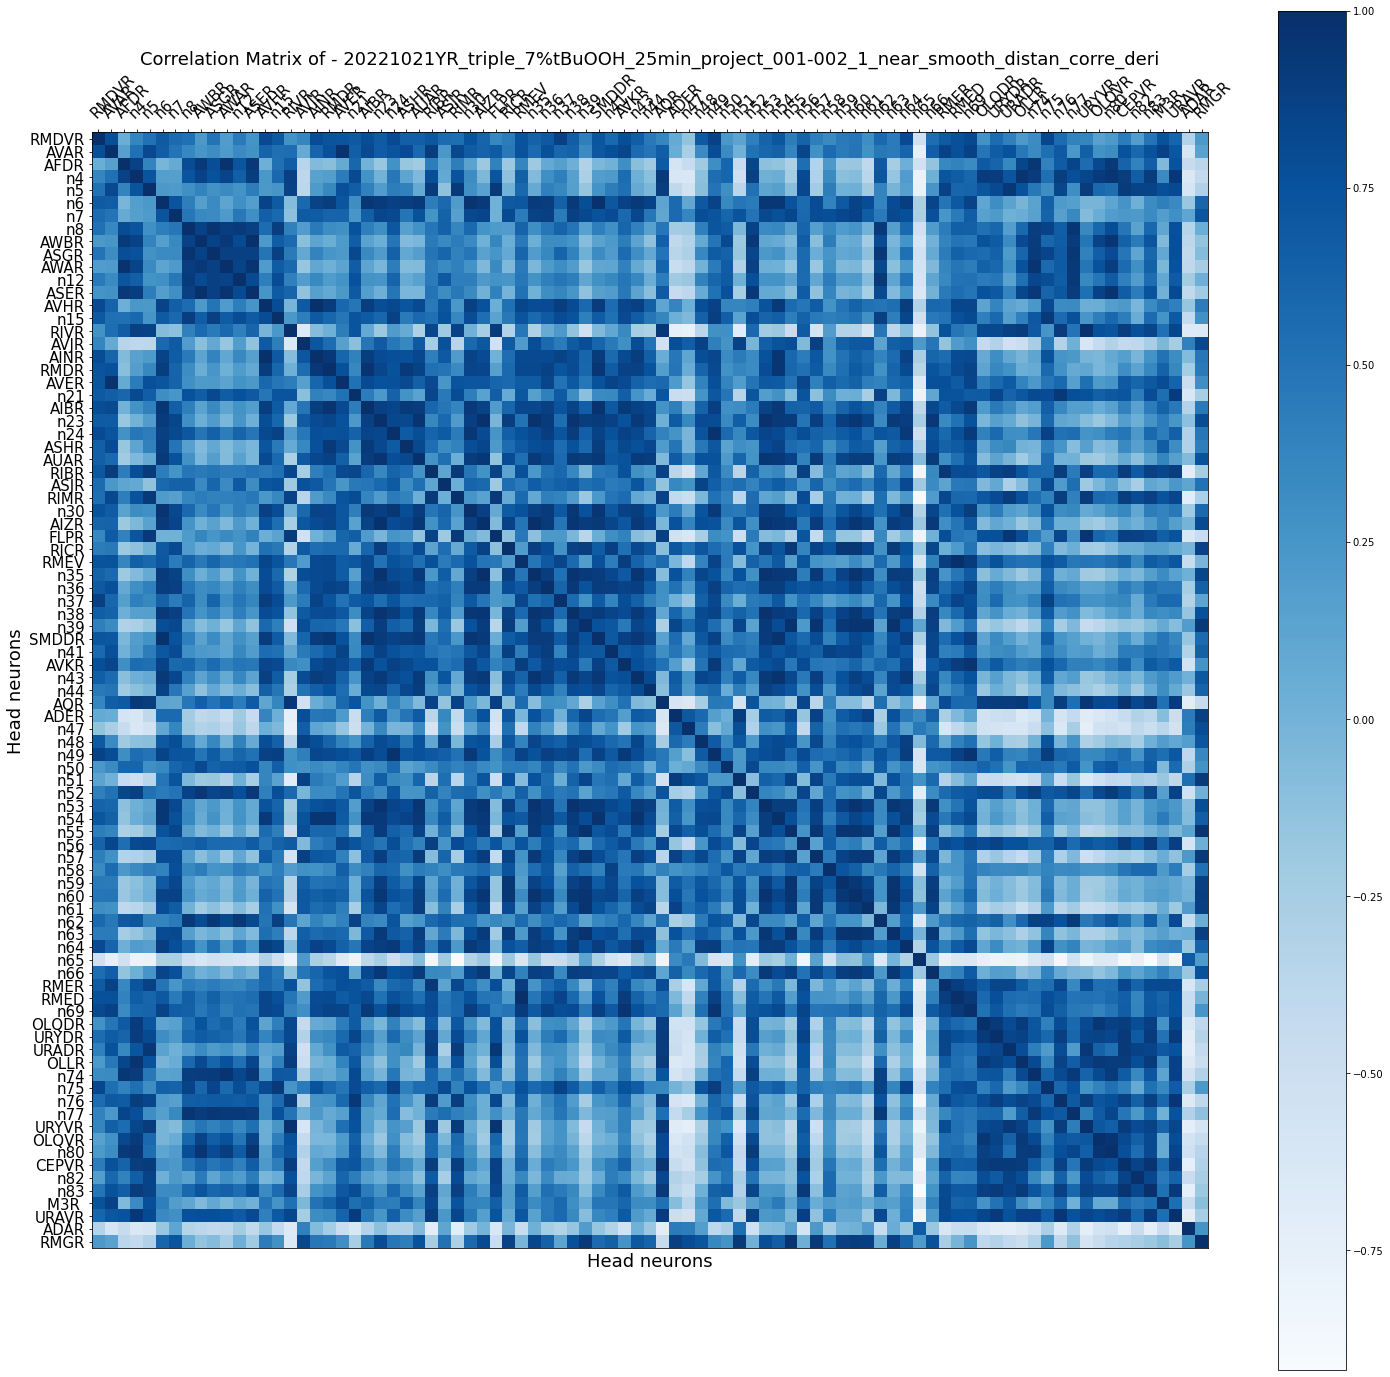

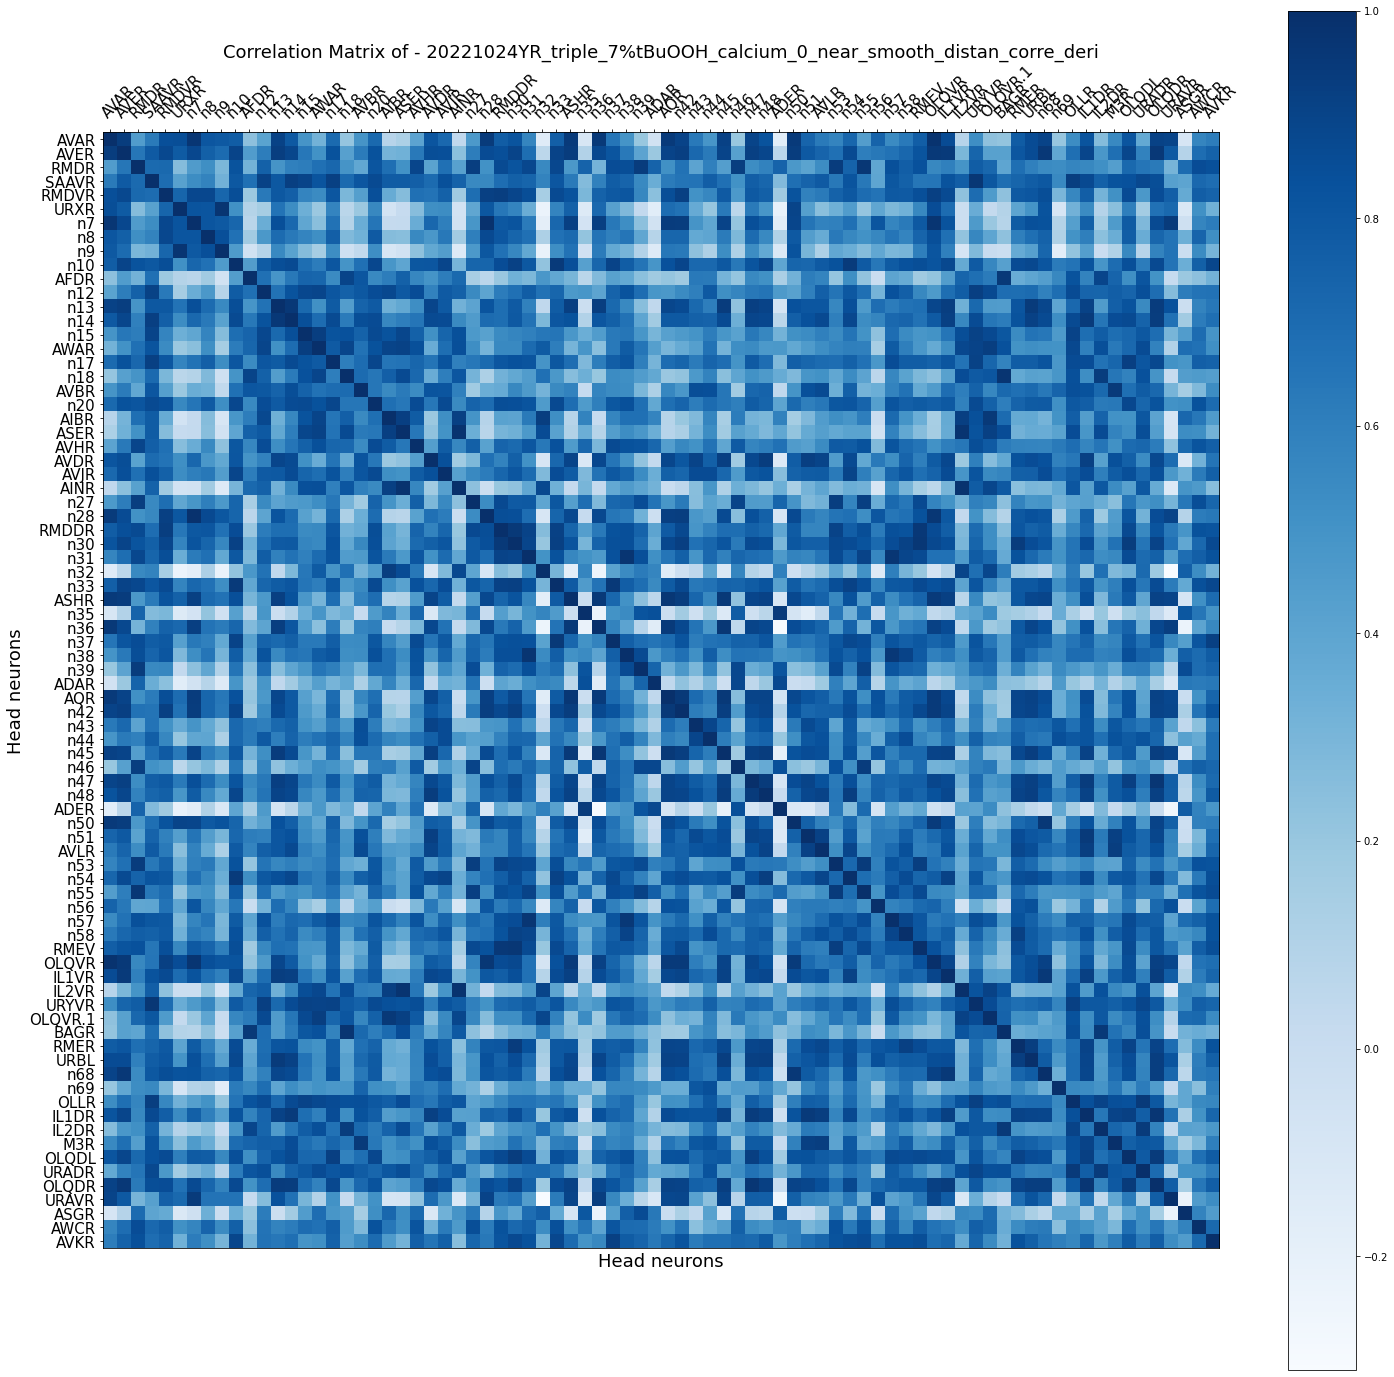

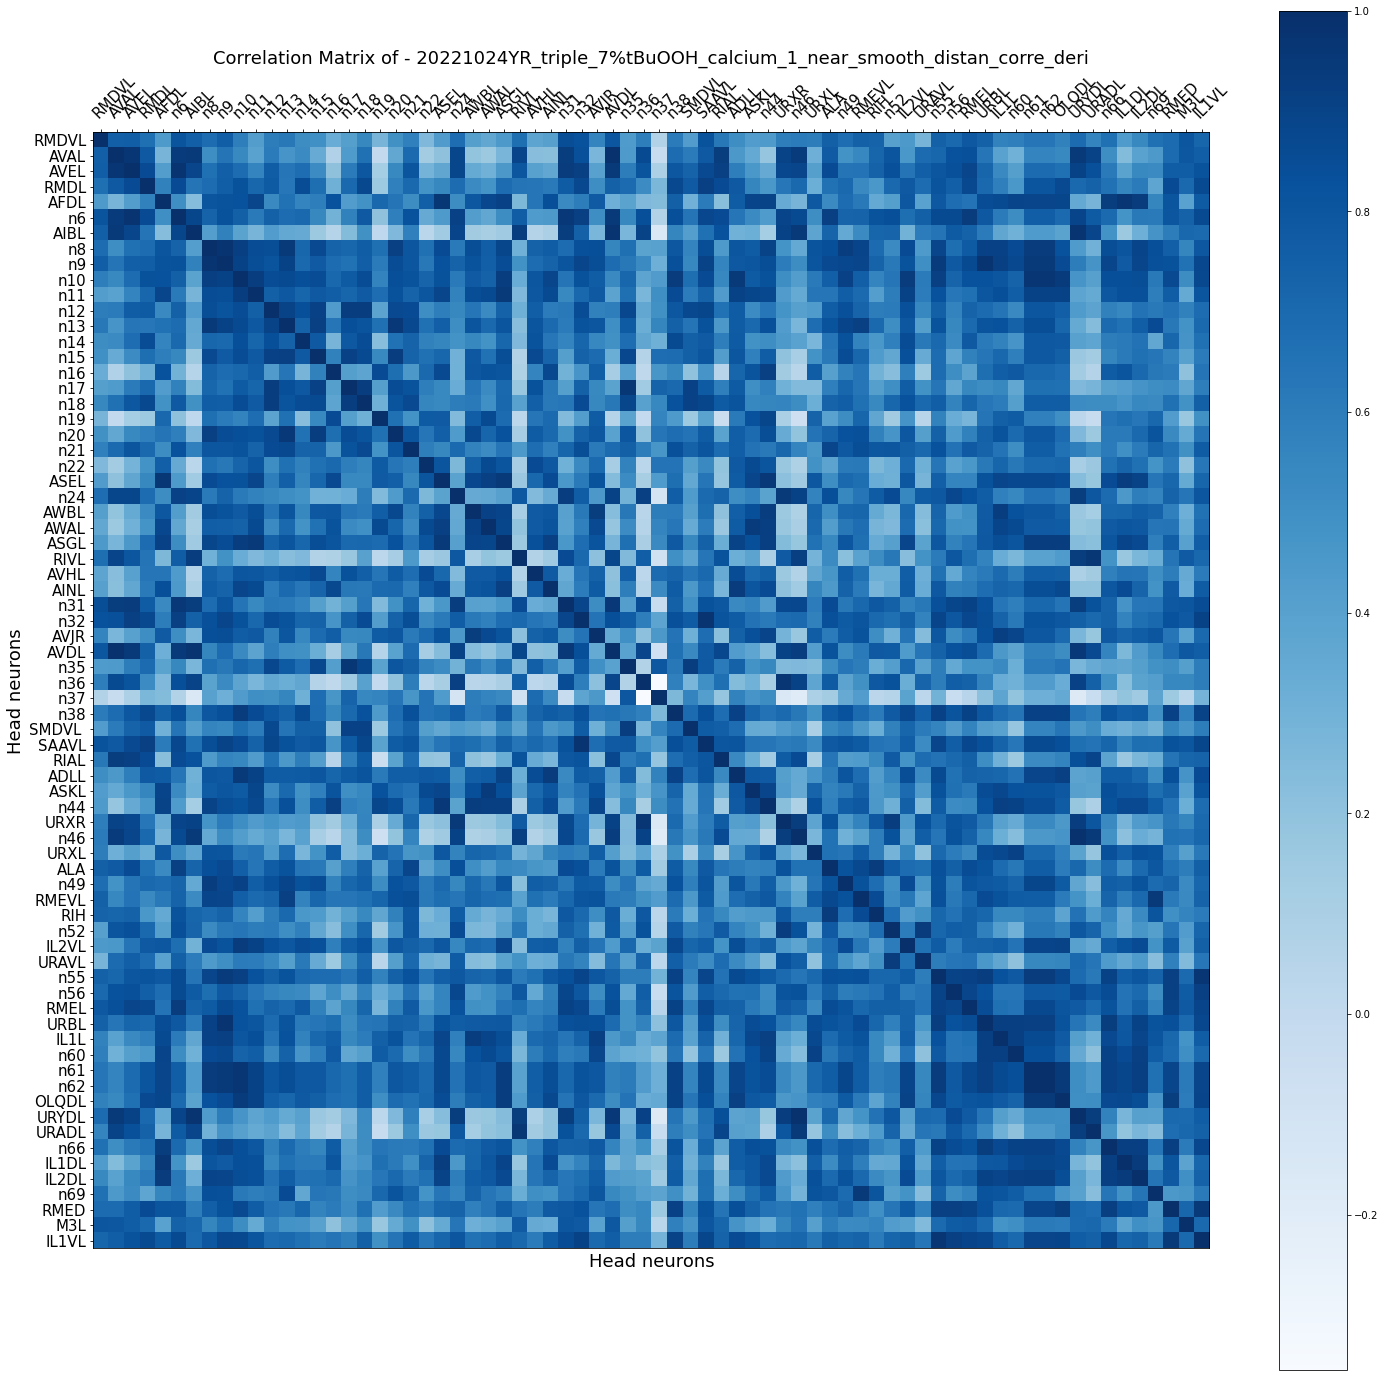

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


# set the folder path and suffix
folder_path = "C:/Users/uqyrong/Desktop/test"
suffix = "*_smooth_distan_corre_deri.xlsx"
excel_files = glob.glob(folder_path + "/" + suffix)
# print(excel_files)

for file in excel_files:
    df = pd.read_excel(file, sheet_name="smoo_aver", index_col=0)
    # Extract file name without extension
    file_name = os.path.splitext(os.path.basename(file))[0]
    
    mat = df.values
    corr = np.corrcoef(mat.T)

    # Create a heatmap of the correlation matrix using matplotlib
    fig, ax = plt.subplots(figsize=(25, 25))
    im = ax.imshow(corr, cmap="Blues")

    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set row and column labels from DataFrame column headers
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_yticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=45, ha="left", rotation_mode="anchor", fontsize=15)
    ax.xaxis.set_ticks_position('top')
    for tick in ax.xaxis.get_majorticklabels():
        tick.set_verticalalignment("bottom")
    ax.tick_params(axis='x', pad=8)
    ax.set_yticklabels(df.columns,fontsize=15)

    # Set axis labels
    ax.set_title(f"Correlation Matrix of - {file_name}", fontsize=18)
    ax.set_xlabel("Head neurons", fontsize=18)
    ax.set_ylabel("Head neurons", fontsize=18)

    # 好看的热力图seaborn.heatmap配色: https://blog.csdn.net/weixin_39777626/article/details/95892284

    plt.show()
    fig.savefig(os.path.join(folder_path, f"{os.path.splitext(file_name)[0]}.png"), bbox_inches='tight', transparent=True)